<a href="https://colab.research.google.com/github/BABALEXA/Laboratorny/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867329,1,12,2,1,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0


In [3]:
def create_holes(dataframe, column_name, hole_percentage = 60):


    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


In [4]:
dfh = create_holes(df, 'age')
dfh

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867329,1,12,2,1,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN


In [5]:
#Удаление
dfh_cleaned = dfh.dropna()


dfh_cleaned

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age


In [6]:

#Заполнение при помощи медианы
dfh_filled_median = dfh.fillna(dfh.median())

dfh_filled_median

<ipython-input-6-14bcdda2ed65>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfh_filled_median = dfh.fillna(dfh.median())


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867329,1,12,2,1,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN


In [ ]:
dfh_filled_mean = dfh.fillna(dfh.mean())

dfh_filled_mean

In [8]:
df_filled_mode = df.fillna(df["AGE"].mode()[0])

df_filled_mode

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867329,1,12,2,1,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0


In [9]:
#Заполнение при помощи интерполяции
dfh_interpolated = dfh.interpolate()

dfh_interpolated

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,age
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN
867329,1,12,2,1,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0,NaN


**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [10]:
df['AGE'].describe()

count    867330.000000
mean         42.424431
std          17.108855
min           0.000000
25%          30.000000
50%          41.000000
75%          53.000000
max         121.000000
Name: AGE, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7c507e38e4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c507e38e8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c507e38e200>],
 'medians': [<matplotlib.lines.Line2D at 0x7c507e38ee00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c507e38f0a0>],
 'means': []}

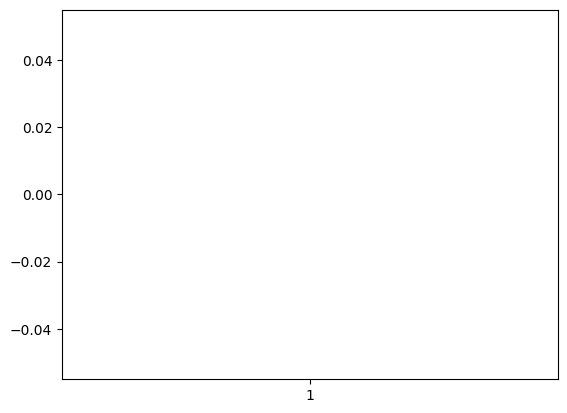

In [13]:
plt.boxplot(df['AGE'])

In [15]:
#Методом среднего
mean = df["AGE"].mean()
std_deviation = df["AGE"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["AGE"] if abs(x - mean) > threshold]
outliers

[95.0,
 97.0,
 97.0,
 97.0,
 95.0,
 100.0,
 103.0,
 94.0,
 96.0,
 101.0,
 107.0,
 102.0,
 97.0,
 98.0,
 94.0,
 100.0,
 99.0,
 94.0,
 95.0,
 95.0,
 99.0,
 94.0,
 96.0,
 94.0,
 99.0,
 95.0,
 95.0,
 96.0,
 97.0,
 99.0,
 100.0,
 98.0,
 96.0,
 95.0,
 99.0,
 97.0,
 95.0,
 96.0,
 96.0,
 96.0,
 94.0,
 100.0,
 94.0,
 95.0,
 97.0,
 99.0,
 94.0,
 98.0,
 97.0,
 98.0,
 95.0,
 94.0,
 94.0,
 100.0,
 99.0,
 98.0,
 94.0,
 94.0,
 95.0,
 94.0,
 100.0,
 95.0,
 96.0,
 95.0,
 97.0,
 94.0,
 95.0,
 97.0,
 97.0,
 96.0,
 98.0,
 97.0,
 95.0,
 94.0,
 95.0,
 97.0,
 98.0,
 96.0,
 97.0,
 98.0,
 98.0,
 97.0,
 94.0,
 96.0,
 94.0,
 99.0,
 95.0,
 94.0,
 94.0,
 95.0,
 95.0,
 98.0,
 95.0,
 98.0,
 96.0,
 95.0,
 96.0,
 94.0,
 94.0,
 97.0,
 95.0,
 95.0,
 97.0,
 96.0,
 99.0,
 96.0,
 95.0,
 95.0,
 97.0,
 97.0,
 96.0,
 95.0,
 94.0,
 97.0,
 98.0,
 95.0,
 99.0,
 95.0,
 96.0,
 94.0,
 94.0,
 99.0,
 94.0,
 94.0,
 94.0,
 95.0,
 98.0,
 96.0,
 95.0,
 96.0,
 94.0,
 94.0,
 98.0,
 94.0,
 94.0,
 95.0,
 95.0,
 99.0,
 96.0,
 94.0,
 98.0,
 95

In [16]:
#При помощи межквартильного размаха
Q1 =  df["AGE"].quantile(0.25)
Q3 = df["AGE"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df["AGE"] > (Q1-1.5*IQR )) & (df["AGE"] < (Q3+1.5*IQR))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7c507e2ea860>,
 'caps': [<matplotlib.lines.Line2D at 0x7c507e2eada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c507e2ea4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c507e2eb2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c507e2eb580>],
 'means': []}

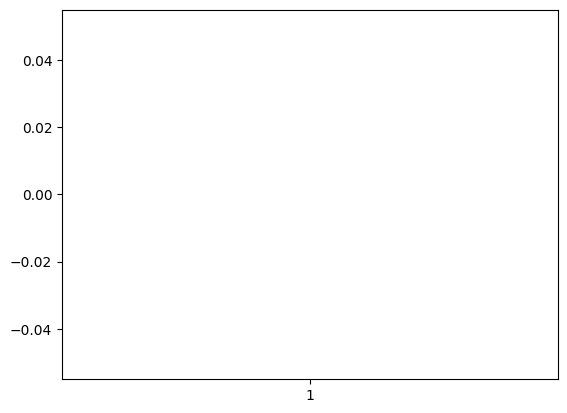

In [18]:
#Статистика и объяснение
df1 = df.query("AGE not in [22, 21, 21]")
plt.boxplot(df1["AGE"])


**Объяснения**

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [19]:
#Проверка на дубли
duplicate_rows = df[df.duplicated()]
duplicate_rows

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
19,2,1,1,1,9999-99-99,97.0,2.0,64.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
35,2,1,2,1,9999-99-99,97.0,2.0,45.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
62,2,1,1,2,9999-99-99,2.0,2.0,25.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0
63,2,1,2,1,9999-99-99,97.0,2.0,33.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
75,2,1,1,1,9999-99-99,97.0,2.0,24.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867324,1,12,1,1,9999-99-99,97.0,2.0,51.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867326,1,12,1,1,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867327,2,12,2,1,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867328,1,12,2,1,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0


In [20]:
#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867302,1,12,2,1,9999-99-99,97.0,1.0,45.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867317,1,12,2,2,9999-99-99,2.0,1.0,69.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,7.0,2.0
867320,1,12,1,2,9999-99-99,2.0,1.0,74.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,7.0,2.0
867325,1,12,2,1,9999-99-99,97.0,2.0,50.0,97.0,2.0,...,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,7.0,97.0


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_minmax_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])

df_minmax_scaled

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1.0,0.0,0.0,0.0,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,1.0,0.0,1.0,0.0,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,1.0,0.0,1.0,1.0,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,1.0,0.0,0.0,0.0,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,1.0,0.0,1.0,0.0,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867326,0.0,1.0,0.0,0.0,9999-99-99,97.0,2.0,10.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867327,1.0,1.0,1.0,0.0,9999-99-99,97.0,2.0,24.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867328,0.0,1.0,1.0,0.0,9999-99-99,97.0,2.0,55.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
867329,0.0,1.0,1.0,0.0,9999-99-99,97.0,2.0,1.0,97.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0


In [23]:
standard_scaler = StandardScaler()
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled.AGE.unique()

array([ 65.,  72.,  55.,  53.,  68.,  40.,  64.,  37.,  25.,  38.,  24.,
        30.,  48.,  23.,  80.,  61.,  54.,  59.,  45.,  26.,  32.,  49.,
        39.,  27.,  57.,  20.,  56.,  47.,  50.,  46.,  43.,  28.,  33.,
        16.,  62.,  58.,  36.,  44.,  66.,  52.,  51.,  35.,  19.,  90.,
        34.,  22.,  29.,  14.,  31.,  42.,  15.,   1.,   0.,  17.,  41.,
         2.,  10.,  12.,  13.,   4.,   7.,   6.,   8.,  60.,   5.,  63.,
        75.,  81.,  67.,  18.,  70.,  88.,  85.,  92.,  73.,  74.,  78.,
        76.,  82.,  77.,  86.,  71.,  95.,  87.,  83.,  84.,  79.,  69.,
        89.,   3.,  97.,  93., 100.,  91.,  21., 103.,  11.,   9.,  94.,
        96., 101., 107., 102.,  98.,  99., 109., 119., 116., 105., 104.,
       111., 114., 120., 106., 108., 110., 118., 117., 121., 115., 113.,
        nan])

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])